In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr 
import matplotlib.pyplot as plt
import dask 
import scipy.io
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as m

In [2]:
sst_re= xr.open_dataset('./sst_regrid/sst_mon.nc')
chln_re = xr.open_dataset('./chln_regrid/chln.nc')

In [3]:
sst = sst_re.analysed_sst.groupby('time.month').mean(dim='time')
chln = chln_re.chlor_a.groupby('time.month').mean(dim='time')

In [4]:
sst_june = sst.sel(month=6)
# sla_jl = sla.sel(month=7)
sst_jl = sst.sel(month=7)
# sla_aug = sla.sel(month=8)
sst_aug = sst.sel(month=8)
# sla_sep = sla.sel(month=9)
sst_sep = sst.sel(month=9)
chln_june = chln.sel(month=6)
chln_jl = chln.sel(month=7)
chln_aug = chln.sel(month=8)
chln_sep = chln.sel(month=9)

In [5]:
chljune =chln_june.to_numpy().flatten()
chljl =chln_jl.to_numpy().flatten()
chlaug =chln_aug.to_numpy().flatten()
chlsep =chln_sep.to_numpy().flatten()
sstjune = sst_june.to_numpy().flatten()
sstjl = sst_jl.to_numpy().flatten()
sstaug = sst_aug.to_numpy().flatten()
sstsep = sst_sep.to_numpy().flatten()

In [6]:
lat=sst_re.coords['lat'].to_numpy()
lon=sst_re.coords['lon'].to_numpy()

In [7]:
d6={'chln_june':chljune,'sst_june':sstjune}    #dictionary 
df06= pd.DataFrame(data=d6) 
d7={'chln_jl':chljl,'sst_jl':sstjl}    #dictionary 
df07= pd.DataFrame(data=d7) 
d8={'chln_aug':chlaug,'sst_aug':sstaug}    #dictionary 
df08= pd.DataFrame(data=d8) 
d9={'chln_sep':chlsep,'sst_sep':sstsep}    #dictionary 
df09= pd.DataFrame(data=d9) 

In [8]:
df06 = df06.apply (pd.to_numeric, errors='coerce') 
df07 = df07.apply (pd.to_numeric, errors='coerce') 
df08 = df08.apply (pd.to_numeric, errors='coerce') 
df09 = df09.apply (pd.to_numeric, errors='coerce')

In [9]:
df6 = df06.dropna()
df7 = df07.dropna()
df8 = df08.dropna()
df9 = df09.dropna()

In [10]:
x6 = df6[['sst_june','chln_june']].values
x7 = df7[['sst_jl','chln_jl']].values
x8 = df8[['sst_aug','chln_aug']].values
x9 = df9[['sst_sep','chln_sep']].values

In [11]:
from sklearn.cluster import KMeans

In [12]:
from matplotlib.colors import ListedColormap
ccmap = ListedColormap([ "midnightblue","red","yellow","deeppink","cyan"])

In [13]:
model6 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y6_clusters = model6.fit_predict(x6)

In [14]:
model7 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y7_clusters = model7.fit_predict(x7)

In [15]:
model8 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y8_clusters = model8.fit_predict(x8)

In [16]:
model9 = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 1, random_state = np.random.RandomState(42))
y9_clusters = model9.fit_predict(x9)

In [17]:
def plot_background(ax):
#     ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=0.5)
#     ax.set_global()
    # ax.add_feature(cfeature.LAND, color='lightgray')
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    ax.set_xlim(298,304.5)
    ax.legend()
    ax.set_xlabel('Sea surface temperature (K)')
    ax.set_ylabel('Chl-a (mg/m$^3$)')
#     ax.set_zlabel('SLA (m)')
    # ax.grax.view_init(elev=50, azim=225)
    return ax

In [18]:
x= [x6,x7,x8,x9]
y =[y6_clusters,y7_clusters,y8_clusters,y9_clusters]
titles = ['June', 'July', 'August', 'September']

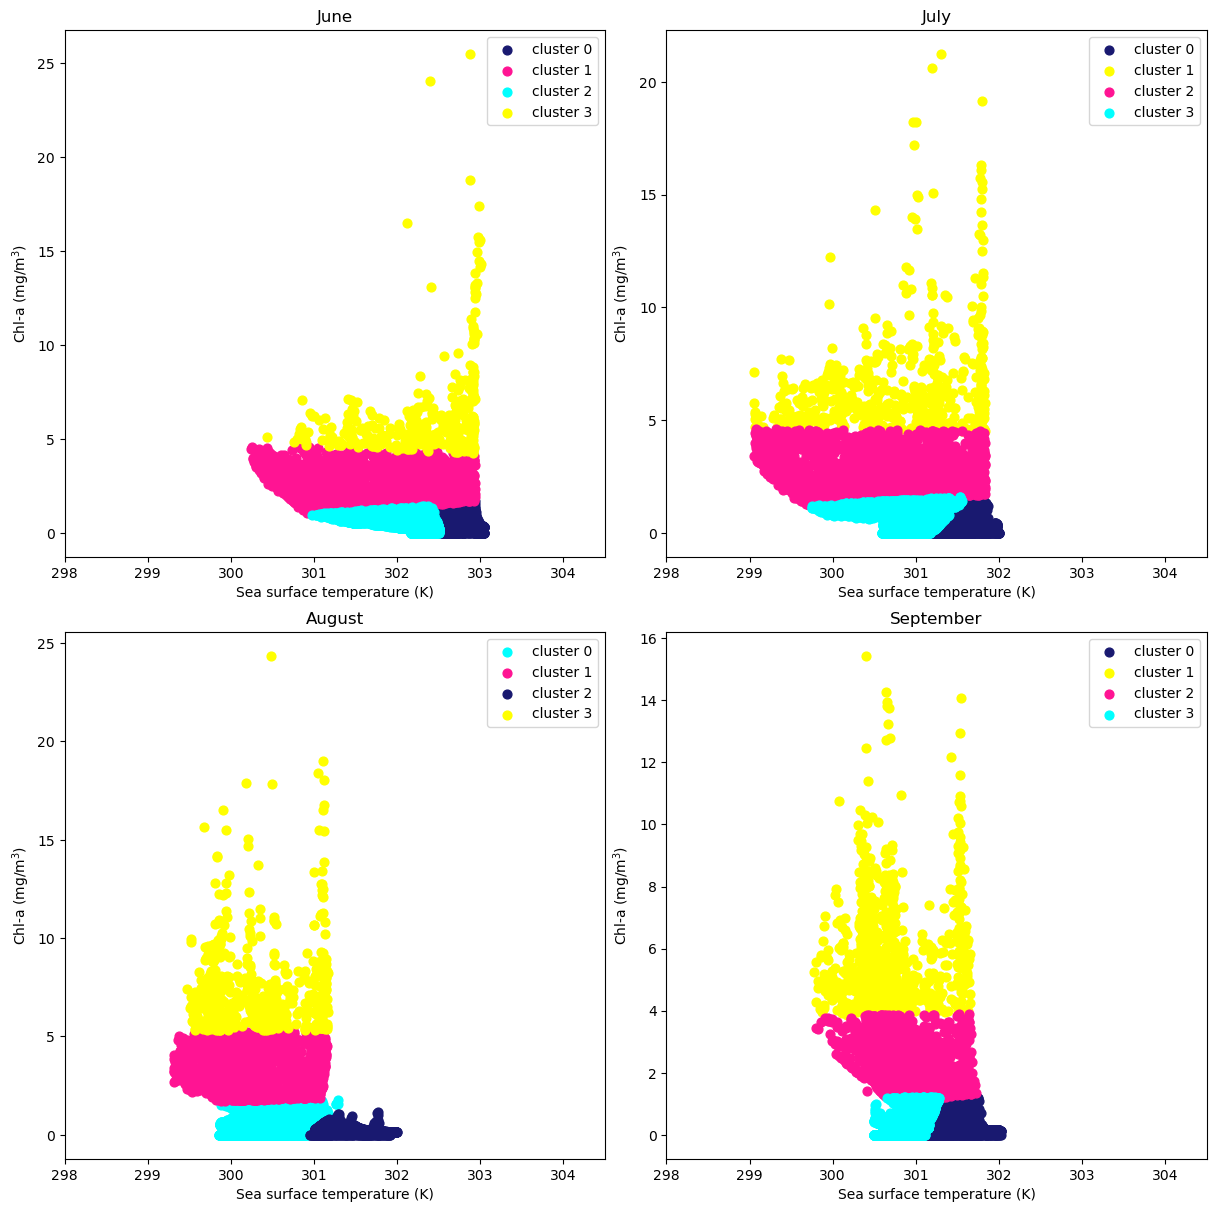

In [19]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,12), constrained_layout=True)
axlist = axarr.flatten()

# for i in range(len(x)):

axlist[0].scatter(x[0][y[0] == 0,0],x[0][y[0] == 0,1], s = 40 , color = 'midnightblue', label = "cluster 0")
axlist[0].scatter(x[0][y[0] == 1,0],x[0][y[0] == 1,1], s = 40 , color = 'red')
axlist[0].scatter(x[0][y[0] == 2,0],x[0][y[0] == 2,1], s = 40 , color = 'deeppink', label = "cluster 1")
axlist[0].scatter(x[0][y[0] == 3,0],x[0][y[0] == 3,1], s = 40 , color = 'cyan', label = "cluster 2")
axlist[0].scatter(x[0][y[0] == 4,0],x[0][y[0] == 4,1], s = 40 , color = 'yellow', label = "cluster 3")
    
axlist[1].scatter(x[1][y[1] == 0,0],x[1][y[1] == 0,1], s = 40 , color = 'midnightblue', label = "cluster 0")
axlist[1].scatter(x[1][y[1] == 1,0],x[1][y[1] == 1,1], s = 40 , color = 'red')
axlist[1].scatter(x[1][y[1] == 2,0],x[1][y[1] == 2,1], s = 40 , color = 'yellow', label = "cluster 1")
axlist[1].scatter(x[1][y[1] == 3,0],x[1][y[1] == 3,1], s = 40 , color = 'deeppink', label = "cluster 2")
axlist[1].scatter(x[1][y[1] == 4,0],x[1][y[1] == 4,1], s = 40 , color = 'cyan', label = "cluster 3")
    
axlist[2].scatter(x[2][y[2] == 0,0],x[2][y[2] == 0,1], s = 40 , color = 'cyan', label = "cluster 0")
axlist[2].scatter(x[2][y[2] == 1,0],x[2][y[2] == 1,1], s = 40 , color = 'red')
axlist[2].scatter(x[2][y[2] == 2,0],x[2][y[2] == 2,1], s = 40 , color = 'deeppink', label = "cluster 1")
axlist[2].scatter(x[2][y[2] == 3,0],x[2][y[2] == 3,1], s = 40 , color = 'midnightblue', label = "cluster 2")
axlist[2].scatter(x[2][y[2] == 4,0],x[2][y[2] == 4,1], s = 40 , color = 'yellow', label = "cluster 3")
                  
axlist[3].scatter(x[3][y[3] == 0,0],x[3][y[3] == 0,1], s = 40 , color = 'midnightblue', label = "cluster 0")
axlist[3].scatter(x[3][y[3] == 1,0],x[3][y[3] == 1,1], s = 40 , color = 'red')
axlist[3].scatter(x[3][y[3] == 2,0],x[3][y[3] == 2,1], s = 40 , color = 'yellow', label = "cluster 1")
axlist[3].scatter(x[3][y[3] == 3,0],x[3][y[3] == 3,1], s = 40 , color = 'deeppink', label = "cluster 2")
axlist[3].scatter(x[3][y[3] == 4,0],x[3][y[3] == 4,1], s = 40 , color = 'cyan', label = "cluster 3")
    
for i in range(len(x)):                
    axlist[i].set_title(titles[i], fontsize=12)
for ax in axlist:
    plot_background(ax)
    
plt.savefig('2var_scatter_arab.png', dpi=300, bbox_inches='tight')

In [119]:
df6['model.labels'] = model6.labels_  
df7['model.labels'] = model7.labels_  
df8['model.labels'] = model8.labels_  
df9['model.labels'] = model9.labels_  

C:\Users\hp\AppData\Local\Temp\ipykernel_868\1235934147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['model.labels'] = model6.labels_
C:\Users\hp\AppData\Local\Temp\ipykernel_868\1235934147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['model.labels'] = model7.labels_
C:\Users\hp\AppData\Local\Temp\ipykernel_868\1235934147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [120]:
df6.rename({'chln_june':'chln6','sst_june':'sst6'},axis=1, inplace=True)
df7.rename({'chln_jl':'chln7','sst_jl':'sst7'},axis=1, inplace=True)
df8.rename({'chln_aug':'chln8','sst_aug':'sst8'},axis=1, inplace=True)
df9.rename({'chln_sep':'chln9','sst_sep':'sst9'},axis=1, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_868\2628726100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.rename({'chln_june':'chln6','sst_june':'sst6'},axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_868\2628726100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.rename({'chln_jl':'chln7','sst_jl':'sst7'},axis=1, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_868\2628726100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [121]:
df6join = pd.concat([df06, df6], join = "outer", axis=1)
df6join.drop(columns = ['chln6', 'sst6'], inplace= True)
df7join = pd.concat([df07, df7], join = "outer", axis=1)
df7join.drop(columns = ['chln7', 'sst7'], inplace= True)

df8join = pd.concat([df08, df8], join = "outer", axis=1)
df8join.drop(columns = ['chln8', 'sst8'], inplace= True)
df9join = pd.concat([df09, df9], join = "outer", axis=1)
df9join.drop(columns = ['chln9', 'sst9'], inplace= True)

In [122]:
karray6 = df6join['model.labels'].to_numpy()
karray7 = df7join['model.labels'].to_numpy()
karray8 = df8join['model.labels'].to_numpy()
karray9 = df9join['model.labels'].to_numpy()

In [123]:
karray62d = np.reshape(karray6, (301,277))
karray72d = np.reshape(karray7, (301,277))
karray82d = np.reshape(karray8, (301,277))
karray92d = np.reshape(karray9, (301,277))

In [124]:
clusters = xr.DataArray(
    data=karray92d,
    dims=["lat", "lon"],
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
    ),
)

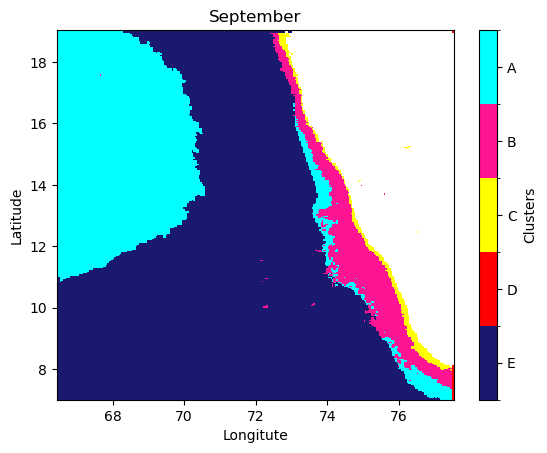

In [127]:
mesh = clusters.plot(levels = [0,1,2,3,4,5], add_colorbar = False, cmap= ccmap)
cbar = plt.colorbar(mesh, label = "Clusters")
cbar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5])
cbar.set_ticklabels(["E","D","C", "B", "A"])
plt.title('September')
plt.xlabel("Longitute")
plt.ylabel("Latitude")
plt.savefig('2var_map_sept.png', dpi=300)
# plt.show()

In [126]:
# clusters.plot()